# Simple Network with Single Stage and Error 

This example contains a simple single stage neural network with 6 inputs and 12 outputs. It is based on a simple example found on the internet for detecting brail characters. A single stage can't properly handle this example which requires 7 hidden layers so this test is just run using an identity matrix along with the first 6 entries of that example to prove convergence and connectivity. 



## Hardware Details

The hardware block for this structure is simple and consists of 3 main units. 

1. Memory Unit  : Containing separate memories for the data/tap and bias
1. Neural Stage : Containing a set of neurons which are shared for the calculation
1. Error Stage  : Containing a calculation of the expected data vs input data


## Code Generator Details

The code used for this example is contained in the following locations : 

1. [Test Generator](https://github.com/andywag/NeuralHDL/blob/master/src/test/scala/com/simplifide/generate/neural/SingleStageTest.scala)
1. [Block Generator](https://github.com/andywag/NeuralHDL/blob/master/src/main/scala/com/simplifide/generate/blocks/neural/simple/NeuralNetwork.scala)
1. [Generated Code and Test Results](https://github.com/andywag/NeuralHDL/tree/master/tests/simple)


In [16]:
## Test Results

In [17]:
import sys
sys.path.append("../../python") # go to parent dir

import numpy as numpy
import matplotlib.pyplot as plt
import utils.FloatUtil as fu
import utils.PlotUtil as pu

def show_results(base,outputs) : 
    error   = fu.load_float_file(base + "rtl_error.hex")
    bias    = fu.load_float_file(base + "rtl_bias.hex")
    output  = fu.load_float_file(base + "rtl_out.hex")
    tap  = fu.load_float_array_file(base + "rtl_tap.hex")
    
    plt.figure(figsize=(8,6))
    pu.plotStageResult(output,error,bias,tap,1, "stage 0 ")
    plt.show()
    


### Identity Matrix Test Results 

This very simple network will not properly converge for this example. For that reason the network was tested with an identity matrix (input = output) to prove the convergence of the taps and bias for this case. The results of the test are shown below with a relatively quick convergence and small steady state error. The case is not actually an identity matrix but a diagonal matrix with alternating +1/-1.  

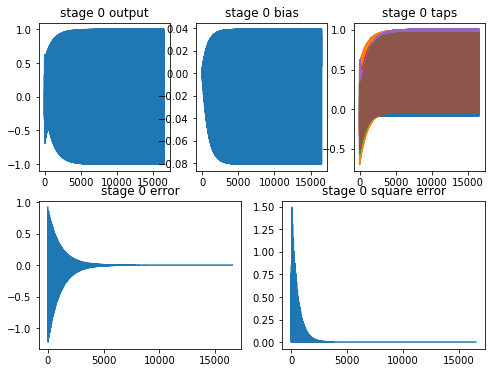

In [18]:
show_results("/home/andy/projects/NeuralHDL/tests/simple/data_ident/",8)

### Test results with full test Case

This test uses an input which was found from an example on the internet shown below. 

http://neuroph.sourceforge.net/tutorials/Braille/RecognitionOfBrailleAlphabetUsingNeuralNetworks.html

The example below is only using the first 6 entries for this test. 

```scala
  Array(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)
  Array(1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0)
  Array(1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0)
  Array(1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0)
  Array(1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0)
  Array(0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0)
```

The test results for this case are shown below. The only purpose of this test is to show convergence and tracking. 

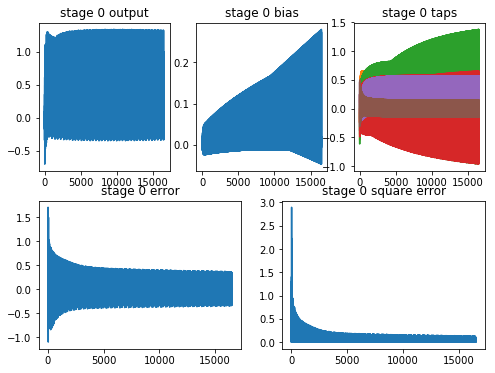

In [19]:
show_results("/home/andy/projects/NeuralHDL/tests/simple/data/",8)